#THY Travel Datathon Preselection Case Study

by Duygu Can, Meriç Pakkan, Şule Kütükde, Neslihan Oflaz


Flying passengers can check-in through the web site, applications, kiosks and counters. In this case study content, the train data including the number of seven-month passenger check-in operations is provided. We want you to estimate the number of channels (column Operation_Count) in the csv file attached.

Mount drive to load the data:

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Expolaration

Upload the data by reading provided .csv files from Google Drive (change path if needed). There are 808696 samples in the training and 121921 instances in the test sets. Each has 23 features.

In [3]:
import pandas as pd
train_df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Train Data.csv")
result_df = pd.read_csv("/content/drive/My Drive/Travel Datathon/Assessment Data/Assessment Result File.csv")
print(train_df.shape)
print(result_df.shape)
train_df.head()

(808696, 23)
(121921, 23)


,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
0,20190326,20190326,KDT,KDT,?,032363,KS,?,QC,MISTER,M,IST,?,1,Y,1,0,0,0,1,0,0,1
1,20180321,20180321,KDT,KDT,?,03F960,KS,?,QC,MISTER,M,?,KDT,1,Y,1,0,0,0,1,0,0,1
2,20190322,20190322,KDT,KDT,?,03AA2P,KS,Y011161,QC,MISTER,M,?,?,1,Y,0,0,0,0,0,0,0,1
3,20180515,20180515,KDT,KDT,?,0353D0,MK,?,TS,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,2
4,20190420,20190420,KDT,KDT,?,03F902,KS,Y013437,QC,MISTER,M,?,?,1,Y,0,0,0,1,0,0,0,1


In [46]:
result_df.head()

,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
0,2019-06-08,2019-06-07,KDT,KDT,NaN,03539F,MK,?,TS,MISS,F,?,?,1,Y,1,1,17,0,0,0,0,
1,2019-06-09,2019-06-09,KDT,KDT,NaN,03F39C,KS,Y013171,QC,MISTER,M,?,?,1,Y,0,1,7,0,0,0,0,
2,2019-06-12,2019-06-12,KDT,KDT,NaN,032A72,KS,Y013347,QC,MISTER,M,?,KDT,1,Y,1,0,0,0,0,0,0,
3,2019-06-13,2019-06-12,KDT,KDT,NaN,0302F9,Q7,?,TW,MISTER,M,IST,?,1,Y,1,0,0,0,1,0,0,
4,2019-06-02,2019-06-01,KDT,KDT,NaN,03023B,MK,?,TW,MISS,F,?,?,1,Y,0,1,18,0,0,0,0,


Check what data types we have:

In [4]:
train_df.dtypes

Departure_YMD_LMT             int64
Operation_YMD_LMT             int64
Departure_Airport            object
Operation_Airport            object
Terminal_Number              object
Terminal_Name                object
Operation_Initials           object
Operation_Sonic_Code         object
Operation_Channel            object
Passenger_Title              object
Passenger_Gender             object
Inbound_Departure_Airport    object
Outbound_Arrival_Airport     object
SWC_FLY                       int64
Cabin_Class                  object
SWC_FQTV_Member               int64
Passenger_Baggage_Count       int64
Passenger_Baggage_Weight      int64
SWC_Staff                     int64
SWC_CIP_Passenger             int64
SWC_VIP_Passenger             int64
SWC_Has_Infant                int64
Operation_Count               int64
dtype: object

In the *Departure_YMD_LMT* and the *Operation_YMD_LMT* colums, date of departure and date of check is stored so it is convenient to convert them to date time objects.

In [0]:
train_df['Departure_YMD_LMT'] = pd.to_datetime(train_df['Departure_YMD_LMT'], format='%Y%m%d')
train_df['Operation_YMD_LMT'] = pd.to_datetime(train_df['Operation_YMD_LMT'], format='%Y%m%d')
result_df['Departure_YMD_LMT'] = pd.to_datetime(result_df['Departure_YMD_LMT'], format='%Y%m%d')
result_df['Operation_YMD_LMT'] = pd.to_datetime(result_df['Operation_YMD_LMT'], format='%Y%m%d')

In [0]:
train_df.dtypes

Departure_YMD_LMT            datetime64[ns]
Operation_YMD_LMT            datetime64[ns]
Departure_Airport                    object
Operation_Airport                    object
Terminal_Number                      object
Terminal_Name                        object
Operation_Initials                   object
Operation_Sonic_Code                 object
Operation_Channel                    object
Passenger_Title                      object
Passenger_Gender                     object
Inbound_Departure_Airport            object
Outbound_Arrival_Airport             object
SWC_FLY                               int64
Cabin_Class                          object
SWC_FQTV_Member                       int64
Passenger_Baggage_Count               int64
Passenger_Baggage_Weight              int64
SWC_Staff                             int64
SWC_CIP_Passenger                     int64
SWC_VIP_Passenger                     int64
SWC_Has_Infant                        int64
Operation_Count                 

In [0]:
train_df.describe()

,Departure_YMD_LMT,Operation_YMD_LMT,SWC_FLY,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
count,8.086960e+05,8.086960e+05,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000
mean,2.018471e+07,2.018459e+07,0.939140,0.359679,0.655413,8.560313,0.029989,0.148156,0.008257,0.011681,1.534792
std,4.928466e+03,6.826362e+03,0.239073,0.479907,0.963677,13.667213,0.170557,0.355255,0.090489,0.107444,2.223746
min,2.018030e+07,1.999010e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.018042e+07,2.018042e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.018061e+07,2.018061e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.019041e+07,2.019041e+07,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.019053e+07,2.019053e+07,1.000000,1.000000,54.000000,970.000000,1.000000,1.000000,1.000000,1.000000,129.000000


In [6]:
train_df[train_df['Operation_Initials']=='KS'][train_df["Operation_Sonic_Code"]=='?']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
0,2019-03-26,2019-03-26,KDT,KDT,?,032363,KS,?,QC,MISTER,M,IST,?,1,Y,1,0,0,0,1,0,0,1
1,2018-03-21,2018-03-21,KDT,KDT,?,03F960,KS,?,QC,MISTER,M,?,KDT,1,Y,1,0,0,0,1,0,0,1
10,2018-04-12,2018-04-12,KDT,KDT,?,032334,KS,?,QC,MISTER,M,EST,?,1,Y,1,0,0,0,0,0,0,1
11,2018-03-21,2018-03-21,KDT,KDT,?,03F93B,KS,?,QC,MISTER,M,?,KGP,1,Y,0,0,0,0,0,0,0,1
12,2018-03-19,2018-03-19,KDT,KDT,?,03F3P4,KS,?,QC,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,1
21,2018-03-26,2018-03-26,KDT,KDT,?,032A40,KS,?,QC,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,3
28,2018-06-19,2018-06-19,KDT,KDT,?,03237C,KS,?,QC,MISS,F,?,?,1,Y,0,5,66,0,0,0,0,1
35,2018-04-23,2018-04-23,KDT,KDT,?,03FD5A,KS,?,QC,MISS,F,?,?,1,Y,1,1,13,0,0,0,0,1
37,2018-05-15,2018-05-15,KDT,KDT,?,032933,KS,?,QC,MISS,F,?,?,1,Y,0,4,56,0,0,0,0,1
39,2018-04-30,2018-04-30,KDT,KDT,?,03FD45,KS,?,QC,MISSES,F,?,?,1,Y,1,0,0,0,1,0,0,1


In [0]:
train_df[train_df['Operation_Count']==1][train_df["Operation_Airport"]=='KDT']

In [9]:
train_df.sort_values(['Departure_YMD_LMT','Operation_YMD_LMT','Operation_Airport'])

,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count
197014,2018-03-01,1999-01-01,KDT,DUS,?,03F9D1,BA,?,QC,MISTER,M,IST,MUN,1,C,1,0,0,0,1,0,0,1
216690,2018-03-01,1999-01-01,KDT,FRK,?,03F905,AL,?,QC,MISTER,M,IST,FRK,1,C,1,0,0,0,1,0,0,2
228274,2018-03-01,1999-01-01,KDT,FRK,?,03F3D6,KB,?,QC,MISTER,M,IST,FRK,1,C,1,0,0,0,1,0,0,1
281868,2018-03-01,1999-01-01,KDT,OGU,?,035447,MK,?,TS,MISTER,M,EST,OGU,1,Y,0,0,0,0,0,0,0,1
670346,2018-03-01,1999-01-01,KDT,VIE,?,095535,BD,?,TY,MISS,F,IST,?,1,Y,0,0,0,0,0,0,0,1
183019,2018-03-01,2018-02-27,KDT,EST,?,0352C1,MK,?,JW,MISSES,F,EST,TZX,1,Y,1,0,0,0,0,0,0,1
351260,2018-03-01,2018-02-27,KDT,EST,?,03539B,MK,?,TS,MISTER,M,EST,EST,1,Y,1,1,6,0,0,0,0,1
716964,2018-03-01,2018-02-27,KDT,EST,?,035443,MK,?,TS,MISTER,M,EST,?,1,Y,1,0,0,0,0,0,0,1
211133,2018-03-01,2018-02-27,KDT,IST,?,03539F,MK,?,TS,MISTER,M,IST,KYT,1,Y,1,0,0,0,1,0,0,1
2524,2018-03-01,2018-02-27,KDT,KDT,P2,0302F3,MK,?,TW,MISS,F,IST,?,1,Y,0,0,0,0,0,0,0,1


Convert *object* datatype to category when needed.

In [0]:
for col_name in train_df:
    if train_df[col_name].dtype.name == 'object':
        train_df[col_name] = train_df[col_name].astype('category')
        result_df[col_name] = result_df[col_name].astype('category')

In [0]:
train_df.dtypes

Departure_YMD_LMT            datetime64[ns]
Operation_YMD_LMT            datetime64[ns]
Departure_Airport                  category
Operation_Airport                  category
Terminal_Number                    category
Terminal_Name                      category
Operation_Initials                 category
Operation_Sonic_Code               category
Operation_Channel                  category
Passenger_Title                    category
Passenger_Gender                   category
Inbound_Departure_Airport          category
Outbound_Arrival_Airport           category
SWC_FLY                               int64
Cabin_Class                        category
SWC_FQTV_Member                       int64
Passenger_Baggage_Count               int64
Passenger_Baggage_Weight              int64
SWC_Staff                             int64
SWC_CIP_Passenger                     int64
SWC_VIP_Passenger                     int64
SWC_Has_Infant                        int64
Operation_Count                 

See the unique levels of the categorical columns. *Departure Airport* has only one value called "KDT". So, it is not informative and should be dropped.

In [0]:
for col_name in train_df.columns:
    if train_df[col_name].dtype.name == 'category':
        print(col_name, ":", train_df[col_name].unique())

Departure_Airport : [KDT]
Categories (1, object): [KDT]
Operation_Airport : [KDT, IST, ZKG, EST, GZT, ..., HRK, ODS, SOF, KNN, MNL]
Length: 143
Categories (143, object): [KDT, IST, ZKG, EST, ..., ODS, SOF, KNN, MNL]
Terminal_Number : [?, P1, P2]
Categories (3, object): [?, P1, P2]
Terminal_Name : [032363, 03F960, 03AA2P, 0353D0, 03F902, ..., 0B19C9, 03554A, 0302CA, 035316, 03550B]
Length: 2685
Categories (2685, object): [032363, 03F960, 03AA2P, 0353D0, ..., 03554A, 0302CA, 035316, 03550B]
Operation_Initials : [KS, MK, SC, EY, Q7, ..., NB, YK, RW, OA, JF]
Length: 273
Categories (272, object): [KS, MK, SC, EY, ..., YK, RW, OA, JF]
Operation_Sonic_Code : [?, Y011161, Y013437, Y027434, Y013171, ..., M025037, Y019509, Y036439, Y015916, Y039203]
Length: 1614
Categories (1614, object): [?, Y011161, Y013437, Y027434, ..., Y019509, Y036439, Y015916,
                            Y039203]
Operation_Channel : [QC, TS, JW, TW, TY, ..., CC, BD, IR, IA, QR]
Length: 13
Categories (13, object): [QC, TS,

Generate *Operation_Channel_Group* as defined in the pdf file.

In [11]:
dict = {"JW": 'Online',
        "TW": 'Online',
        "TS": 'Mobile',
        "JM": 'Mobile',
        "TY":"Counter",
        "QC":"Counter",
        "SC":"Kiosks",
        "IR":"Other",
        "?":"Other",
        "IA":"Other",
        "BD":"Other",
        "CC":"Other",
        "QR":"Other",
        "QP":"Other",
        "QA":"Other"
        }
train_df['Operation_Channel_Group'] = train_df['Operation_Channel'].map(dict)
train_df['Operation_Channel_Group'].unique()

array(['Counter', 'Mobile', 'Online', 'Kiosks', 'Other'], dtype=object)

In [13]:
Other = train_df[train_df['Operation_Channel_Group']=='Other']
for col_name in Other.columns:
    if Other[col_name].dtype.name == 'category':
        print(col_name, ":", Other[col_name].unique())

Departure_Airport : [KDT]
Categories (1, object): [KDT]
Operation_Airport : [KDT, IST, SKW, EST, MKK, ..., MNT, ZRH, SVO, MLX, DOH]
Length: 42
Categories (42, object): [KDT, IST, SKW, EST, ..., ZRH, SVO, MLX, DOH]
Terminal_Number : [P2, ?, P1]
Categories (3, object): [P2, ?, P1]
Terminal_Name : [031639, 0315B7, 031633, 03902B, 03159A, ..., 0315A4, 031640, 03P43F, 03162C, 03163D]
Length: 160
Categories (160, object): [031639, 0315B7, 031633, 03902B, ..., 031640, 03P43F, 03162C, 03163D]
Operation_Initials : [MK, EY, KS, Q7, MR, ..., FC, YB, MA, AO, 2W]
Length: 15
Categories (15, object): [MK, EY, KS, Q7, ..., YB, MA, AO, 2W]
Operation_Sonic_Code : [?, Y010330, D049731, R043402, Y026945, ..., R033000, Y014073, Y023677, Y033530, Y015523]
Length: 26
Categories (26, object): [?, Y010330, D049731, R043402, ..., Y014073, Y023677, Y033530, Y015523]
Operation_Channel : [?, CC, BD, IR, IA, QR]
Categories (6, object): [?, CC, BD, IR, IA, QR]
Passenger_Title : [MISTER, MISSES, MISS, ?, PROFFESOR, D

## Unknown Value ("?") Handling

Column percentage of null values in the training and test sets are printed below. At first glance,there are only null values in the *Operation Initials* column, however some unknown values are encoded as "?" in the datasets.

In [0]:
(train_df.isnull().mean()*100).round(4)

Departure_YMD_LMT            0.0000
Operation_YMD_LMT            0.0000
Departure_Airport            0.0000
Operation_Airport            0.0000
Terminal_Number              0.0000
Terminal_Name                0.0000
Operation_Initials           0.0156
Operation_Sonic_Code         0.0000
Operation_Channel            0.0000
Passenger_Title              0.0000
Passenger_Gender             0.0000
Inbound_Departure_Airport    0.0000
Outbound_Arrival_Airport     0.0000
SWC_FLY                      0.0000
Cabin_Class                  0.0000
SWC_FQTV_Member              0.0000
Passenger_Baggage_Count      0.0000
Passenger_Baggage_Weight     0.0000
SWC_Staff                    0.0000
SWC_CIP_Passenger            0.0000
SWC_VIP_Passenger            0.0000
SWC_Has_Infant               0.0000
Operation_Count              0.0000
Operation_Channel_Group      0.0000
dtype: float64

In [0]:
(result_df.isnull().mean()*100).round(4)

Departure_YMD_LMT            0.0000
Operation_YMD_LMT            0.0000
Departure_Airport            0.0000
Operation_Airport            0.0000
Terminal_Number              0.0000
Terminal_Name                0.0000
Operation_Initials           0.0033
Operation_Sonic_Code         0.0000
Operation_Channel            0.0000
Passenger_Title              0.0000
Passenger_Gender             0.0000
Inbound_Departure_Airport    0.0000
Outbound_Arrival_Airport     0.0000
SWC_FLY                      0.0000
Cabin_Class                  0.0000
SWC_FQTV_Member              0.0000
Passenger_Baggage_Count      0.0000
Passenger_Baggage_Weight     0.0000
SWC_Staff                    0.0000
SWC_CIP_Passenger            0.0000
SWC_VIP_Passenger            0.0000
SWC_Has_Infant               0.0000
Operation_Count              0.0000
dtype: float64

Column based "?" occurance percentages in the training set:

In [14]:
import numpy as np
def unknown_perc(df):
  print("Column Name\t Percentage")
  for col_name in df.columns:
        if df[col_name].dtype.name == 'category' and (df[col_name] == "?").any():
          count = df[col_name].value_counts(dropna=False)['?']
          percentage = (count/len(df)*100).round(3)
          print(col_name,"\t", percentage)
  return
        
unknown_perc(train_df)

Column Name	 Percentage
Terminal_Number 	 90.618
Operation_Sonic_Code 	 78.927
Operation_Channel 	 2.112
Passenger_Title 	 2.331
Passenger_Gender 	 3.902
Inbound_Departure_Airport 	 91.338
Outbound_Arrival_Airport 	 64.422
Cabin_Class 	 3.409


Column based "?" occurance percentages in the test set:

In [0]:
unknown_perc(result_df)

Column Name	 Percentage
Terminal_Number 	 91.39
Operation_Sonic_Code 	 54.39
Operation_Channel 	 0.871
Passenger_Title 	 2.762
Passenger_Gender 	 0.076
Inbound_Departure_Airport 	 94.52
Outbound_Arrival_Airport 	 65.008


Convert "?" to NA when needed. Apart from *Inbound_Departure_Airport* and *Outbound_Arrival_Airport*, "?" is printed for unknown values (missing). For those specific columns "?" means that there is no inbound or outbound flight (direct flight).

In [0]:
import numpy as np
train_df['Terminal_Number'] = train_df['Terminal_Number'].replace('?', np.nan)
train_df['Operation_Channel'] = train_df['Operation_Channel'].replace('?', np.nan)
train_df['Passenger_Title'] = train_df['Passenger_Title'].replace('?', np.nan)
train_df['Passenger_Gender'] = train_df['Passenger_Gender'].replace('?', np.nan)
#train_df['Inbound_Departure_Airport'] = train_df['Inbound_Departure_Airport'].replace('?', np.nan)
#train_df['Outbound_Arrival_Airport'] = train_df['Outbound_Arrival_Airport'].replace('?', np.nan)
train_df['Cabin_Class'] = train_df['Cabin_Class'].replace('?', np.nan)

result_df['Terminal_Number'] = result_df['Terminal_Number'].replace('?', np.nan)
result_df['Operation_Channel'] = result_df['Operation_Channel'].replace('?', np.nan)
result_df['Passenger_Title'] = result_df['Passenger_Title'].replace('?', np.nan)
result_df['Passenger_Gender'] = result_df['Passenger_Gender'].replace('?', np.nan)
#result_df['Inbound_Departure_Airport'] = train_df['Inbound_Departure_Airport'].replace('?', np.nan)
#result_df['Outbound_Arrival_Airport'] = train_df['Outbound_Arrival_Airport'].replace('?', np.nan)
result_df['Cabin_Class'] = result_df['Cabin_Class'].replace('?', np.nan)

Now, the new missing value percentages for the training set becomes:

In [0]:
(train_df.isnull().mean()*100).round(4)

Departure_YMD_LMT             0.0000
Operation_YMD_LMT             0.0000
Departure_Airport             0.0000
Operation_Airport             0.0000
Terminal_Number              90.6176
Terminal_Name                 0.0000
Operation_Initials            0.0156
Operation_Sonic_Code          0.0000
Operation_Channel             2.1123
Passenger_Title               2.3307
Passenger_Gender              3.9025
Inbound_Departure_Airport     0.0000
Outbound_Arrival_Airport      0.0000
SWC_FLY                       0.0000
Cabin_Class                   3.4093
SWC_FQTV_Member               0.0000
Passenger_Baggage_Count       0.0000
Passenger_Baggage_Weight      0.0000
SWC_Staff                     0.0000
SWC_CIP_Passenger             0.0000
SWC_VIP_Passenger             0.0000
SWC_Has_Infant                0.0000
Operation_Count               0.0000
Operation_Channel_Group       0.0000
dtype: float64

and for the test set the result is:

In [0]:
(result_df.isnull().mean()*100).round(4)

Departure_YMD_LMT             0.0000
Operation_YMD_LMT             0.0000
Departure_Airport             0.0000
Operation_Airport             0.0000
Terminal_Number              91.3903
Terminal_Name                 0.0000
Operation_Initials            0.0033
Operation_Sonic_Code          0.0000
Operation_Channel             0.8711
Passenger_Title               2.7616
Passenger_Gender              0.0763
Inbound_Departure_Airport     0.0000
Outbound_Arrival_Airport      0.0000
SWC_FLY                       0.0000
Cabin_Class                   0.0000
SWC_FQTV_Member               0.0000
Passenger_Baggage_Count       0.0000
Passenger_Baggage_Weight      0.0000
SWC_Staff                     0.0000
SWC_CIP_Passenger             0.0000
SWC_VIP_Passenger             0.0000
SWC_Has_Infant                0.0000
Operation_Count               0.0000
dtype: float64

Notice that *Terminal_Number* has a missing value ratio over 90%. With a ratio this high, we cannot impute missing values correctly. This column should be dropped, as well as *Departure_Airport* column.


In [0]:
train_df2 = train_df.copy()
result_df2 = result_df.copy()
train_df2 = train_df2.drop(columns = ["Terminal_Number", "Departure_Airport"])
result_df2 = result_df2.drop(columns = ["Terminal_Number", "Departure_Airport"])

Operation_Airport                  category
Terminal_Number                    category
Terminal_Name                      category
Operation_Initials                 category
Operation_Sonic_Code               category
Operation_Channel                  category
Passenger_Title                    category
Passenger_Gender                   category
Inbound_Departure_Airport          category
Outbound_Arrival_Airport           category
Cabin_Class                        category

In [0]:
one_hot = pd.get_dummies(train_df['Terminal_Number'])
train_df = train_df.drop('Terminal_Number',axis = 1)
train_df = train_df.join(one_hot)

In [0]:
one_hot = pd.get_dummies(train_df['Passenger_Title'])
train_df = train_df.drop('Passenger_Title',axis = 1)
train_df = train_df.join(one_hot)

ValueError: ignored

In [0]:
one_hot = pd.get_dummies(train_df['Operation_Channel_Group'])
train_df = train_df.drop('Operation_Channel_Group',axis = 1)
train_df = train_df.join(one_hot)

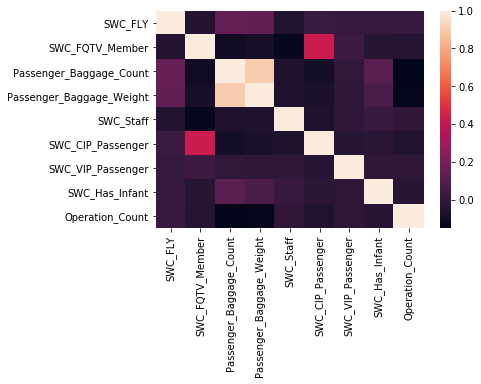

In [16]:
import seaborn as sns
corr = train_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [0]:
grouped = train_df.groupby(['Operation_Channel_Group'])
grouped.get_group('Counter')

,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group
0,2019-03-26,2019-03-26,KDT,KDT,NaN,032363,KS,?,QC,MISTER,M,IST,?,1,Y,1,0,0,0,1,0,0,1,Counter
1,2018-03-21,2018-03-21,KDT,KDT,NaN,03F960,KS,?,QC,MISTER,M,?,KDT,1,Y,1,0,0,0,1,0,0,1,Counter
2,2019-03-22,2019-03-22,KDT,KDT,NaN,03AA2P,KS,Y011161,QC,MISTER,M,?,?,1,Y,0,0,0,0,0,0,0,1,Counter
4,2019-04-20,2019-04-20,KDT,KDT,NaN,03F902,KS,Y013437,QC,MISTER,M,?,?,1,Y,0,0,0,1,0,0,0,1,Counter
6,2019-05-01,2019-05-01,KDT,KDT,NaN,03295F,KS,Y027434,QC,MISTER,M,?,KMS,1,Y,0,0,0,0,0,0,0,2,Counter
10,2018-04-12,2018-04-12,KDT,KDT,NaN,032334,KS,?,QC,MISTER,M,EST,?,1,Y,1,0,0,0,0,0,0,1,Counter
11,2018-03-21,2018-03-21,KDT,KDT,NaN,03F93B,KS,?,QC,MISTER,M,?,KGP,1,Y,0,0,0,0,0,0,0,1,Counter
12,2018-03-19,2018-03-19,KDT,KDT,NaN,03F3P4,KS,?,QC,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,1,Counter
14,2019-03-17,2019-03-17,KDT,KDT,P1,0B3560,KS,Y013171,TY,MISTER,M,?,?,0,Y,1,0,0,0,0,0,0,1,Counter
21,2018-03-26,2018-03-26,KDT,KDT,NaN,032A40,KS,?,QC,MISTER,M,?,?,1,Y,1,0,0,0,1,0,0,3,Counter


Let's transform Operation_Sonic_Code to Operation_Sonic_Code_Flag and Terminal_Name to Terminal_Name_Flag in order to see if these variables are null or not. We choose to do this since there are so many different classes for these variables.

In [0]:
train_df['Operation_Sonic_Code_Flag'] = np.where(train_df['Operation_Sonic_Code']=='?', '0', '1')
train_df['Operation_Sonic_Code_Flag'] = train_df['Operation_Sonic_Code_Flag'].astype(int)
train_df['Terminal_Name_Flag'] = np.where(train_df['Terminal_Name']=='?', '0', '1')
train_df['Terminal_Name_Flag'] = train_df['Terminal_Name_Flag'].astype(int)

We generate another variable to see if people checked in on-time or not. The date is given as days, so how many days there are between the flight and the check-in is added as a variable.

In [0]:
train_df['Early_Check_In'] = (train_df.Departure_YMD_LMT - train_df.Operation_YMD_LMT)
train_df['Early_Check_In'] = (train_df['Early_Check_In']/86400000000000).astype(int)

In [103]:
train_df['Early_Check_In'].unique()

array([   0,    1,    2, 7033,    3,   -1, 7391, 7366, 7367, 7010, 7072,
       7037, 7092, 7105, 7057, 7418, 7426, 7388, 7440, 7008, 7443, 7405,
       7002, 7016, 7415, 7384, 7100, 7455, 7386, 7067, 7378, 7101, 7398,
       7000, 7036, 7431, 7396, 7012, 7454, 7441, 7098, 7371, 7420, 7089,
       7438, 7390, 7028, 7108, 7372, 7047, 7422, 7379, 7096, 7409, 7404,
       7374, 7004, 7013, 7410, 7020, 7088, 7083, 7056, 7102, 7024, 7370,
       7095, 7110, 7051, 7049, 7109, 7421, 7414, 7063, 7452, 7376, 7424,
       7034, 7039, 7429, 6999, 7394, 7040, 7041, 7077, 7053, 7411, 7086,
       7419, 7406, 7369, 7006, 7045, 7385, 7023, 7019, 7069, 7081, 7044,
       7423, 7011, 7437, 7058, 7005, 7087, 7115, 7070, 7027, 7368, 7381,
       7425, 7074, 7389, 7025, 7054, 7076, 7380, 7106, 7432, 7449, 7387,
       7445, 7022, 7413, 7382, 7401, 7062, 7075, 7048, 7393, 7090, 7392,
       7094, 7377, 7364, 7065, 7375, 7453, 7107, 7018, 7064, 7383, 7055,
       7046, 7038, 7031, 7365, 7042, 7442, 7026, 74

Checking if any of these large numbers are real.

In [96]:
train_df[train_df['Early_Check_In']>100].sort_values('Operation_YMD_LMT')

,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status
469,2018-04-04,1999-01-01,KDT,TJV,NaN,03F9C5,KS,?,QC,MISTER,M,EST,?,1,Y,1,0,0,0,0,0,0,2,Counter,0,7033,Myterious
555391,2019-04-21,1999-01-01,KDT,JED,NaN,096D33,AJ,?,TY,MISSES,F,JED,?,1,Y,0,1,10,0,0,0,0,1,Counter,0,7415,Myterious
553128,2019-04-16,1999-01-01,KDT,JED,NaN,095C12,AZ,?,TY,MISTER,M,JED,?,1,Y,1,3,35,0,1,0,0,1,Counter,0,7410,Myterious
551608,2019-03-17,1999-01-01,KDT,ISL,NaN,03293A,KS,Y023293,QC,MISTER,M,?,?,1,Y,0,2,28,0,0,0,0,1,Counter,1,7380,Myterious
551287,2019-03-14,1999-01-01,KDT,ISL,NaN,035443,MK,?,TS,MISTER,NaN,?,?,1,Y,0,0,0,0,0,0,0,1,Mobile,0,7377,Myterious
550406,2018-03-29,1999-01-01,KDT,TJV,NaN,0B3F66,KS,?,TY,MISS,F,?,?,1,Y,0,1,13,1,0,0,0,1,Counter,0,7027,Myterious
549936,2019-05-31,1999-01-01,KDT,KWI,NaN,03237P,LK,?,QC,MISS,F,KWI,?,1,Y,0,0,0,0,0,0,0,2,Counter,0,7455,Myterious
547407,2018-06-04,1999-01-01,KDT,VKO,NaN,03543P,MK,?,TS,MISTER,M,EST,?,1,Y,1,1,8,0,0,0,0,1,Mobile,0,7094,Myterious
543253,2019-04-10,1999-01-01,KDT,TJV,P2,03F901,KS,Y025299,QC,MISTER,M,?,NKV,1,Y,0,1,7,0,0,0,0,1,Counter,1,7404,Myterious
541138,2018-03-12,1999-01-01,KDT,TTS,P1,03294D,NU,?,QC,MISTER,NaN,IST,KSY,0,NaN,0,0,0,0,0,0,0,1,Counter,0,7010,Myterious


Replacing the check-in day as early, on-time and mysterious.



In [0]:
train_df.loc[train_df.Early_Check_In > 100, 'Early_Check_In_Status'] = 'Myterious'
train_df.loc[(train_df.Early_Check_In == 0) | (train_df.Early_Check_In == -1), 'Early_Check_In_Status'] = 'On-time'
train_df.loc[(train_df.Early_Check_In == 1) | (train_df.Early_Check_In == 2) | (train_df.Early_Check_In == 3), 'Early_Check_In_Status'] = 'Early'

In [94]:
train_df.sort_values('Early_Check_In',ascending=False).head(10)

,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In,Early_Check_In_Status
186343,2019-05-31,1999-01-01,KDT,KWI,NaN,03237P,LK,?,QC,MISTER,M,KWI,?,1,Y,0,0,0,0,0,0,0,2,Counter,0,7455,Myterious
731842,2019-05-31,1999-01-01,KDT,KWI,NaN,032A06,ND,?,QC,MISTER,M,KWI,?,1,Y,0,2,18,0,0,0,0,1,Counter,0,7455,Myterious
112096,2019-05-31,1999-01-01,KDT,KWI,NaN,032376,AB,?,QC,MISS,F,KWI,?,1,Y,0,3,36,0,0,0,0,1,Counter,0,7455,Myterious
361727,2019-05-31,1999-01-01,KDT,KWI,NaN,03237P,LK,?,QC,MISTER,M,KWI,?,1,Y,0,2,30,0,0,0,0,1,Counter,0,7455,Myterious
243798,2019-05-31,1999-01-01,KDT,KWI,NaN,0323BP,LK,?,QC,MISTER,M,KWI,?,1,Y,0,1,32,0,0,0,0,1,Counter,0,7455,Myterious
39338,2019-05-31,1999-01-01,KDT,KWI,NaN,03237P,LK,?,QC,MISTER,M,KWI,?,1,Y,0,7,77,0,0,0,0,1,Counter,0,7455,Myterious
438379,2019-05-31,1999-01-01,KDT,KWI,NaN,032A06,ND,?,QC,MISTER,M,KWI,?,1,Y,0,0,0,0,0,0,0,2,Counter,0,7455,Myterious
580640,2019-05-31,1999-01-01,KDT,ENN,NaN,0B016C,KK,?,TY,MISS,F,?,HKG,1,Y,0,1,17,0,0,0,0,1,Counter,0,7455,Myterious
704155,2019-05-31,1999-01-01,KDT,KWI,NaN,032A06,ND,?,QC,MISTER,M,KWI,TZX,1,Y,0,5,68,0,0,0,0,1,Counter,0,7455,Myterious
361904,2019-05-31,1999-01-01,KDT,KWI,NaN,035444,MK,?,TS,MISTER,M,KWI,?,1,Y,1,1,10,0,1,0,0,1,Mobile,0,7455,Myterious


In [95]:
train_df.describe()

,SWC_FLY,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Sonic_Code_Flag,Early_Check_In
count,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000,808696.000000
mean,0.939140,0.359679,0.655413,8.560313,0.029989,0.148156,0.008257,0.011681,1.534792,0.210734,4.589088
std,0.239073,0.479907,0.963677,13.667213,0.170557,0.355255,0.090489,0.107444,2.223746,0.407830,175.499931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,54.000000,970.000000,1.000000,1.000000,1.000000,1.000000,129.000000,1.000000,7455.000000


In [62]:
train_df.sort_values('Early_Check_In', ascending=True)

,Departure_YMD_LMT,Operation_YMD_LMT,Departure_Airport,Operation_Airport,Terminal_Number,Terminal_Name,Operation_Initials,Operation_Sonic_Code,Operation_Channel,Passenger_Title,Passenger_Gender,Inbound_Departure_Airport,Outbound_Arrival_Airport,SWC_FLY,Cabin_Class,SWC_FQTV_Member,Passenger_Baggage_Count,Passenger_Baggage_Weight,SWC_Staff,SWC_CIP_Passenger,SWC_VIP_Passenger,SWC_Has_Infant,Operation_Count,Operation_Channel_Group,Operation_Sonic_Code_Flag,Early_Check_In
416388,2019-03-03,2019-03-04,KDT,KDT,NaN,03F93F,KS,Y030410,QC,MISS,F,?,?,1,Y,1,1,12,0,0,0,0,1,Counter,1,-1
19654,2019-03-03,2019-03-04,KDT,KDT,NaN,0B3D3A,KS,?,TY,MISTER,M,?,?,1,Y,0,0,0,1,0,0,0,1,Counter,0,-1
428177,2019-03-03,2019-03-04,KDT,KDT,NaN,0B3D3A,KS,Y021292,TY,MISSES,F,?,?,1,Y,0,0,0,1,0,0,0,5,Counter,1,-1
264318,2019-03-03,2019-03-04,KDT,KDT,NaN,0B3D3A,KS,Y021292,TY,MISTER,M,?,?,1,Y,0,0,0,0,0,0,0,1,Counter,1,-1
781754,2019-03-03,2019-03-04,KDT,KDT,NaN,03F3AC,KS,Y011194,QC,MISS,F,?,?,1,Y,1,0,0,0,0,0,0,2,Counter,1,-1
216588,2019-03-03,2019-03-04,KDT,KDT,NaN,03F94C,KS,Y013695,QC,MISS,F,?,?,1,Y,1,0,0,0,0,0,0,3,Counter,1,-1
134709,2019-03-03,2019-03-04,KDT,KDT,NaN,03F93F,KS,Y030410,QC,MISS,F,?,?,1,Y,0,0,0,0,0,0,0,3,Counter,1,-1
720728,2019-03-03,2019-03-04,KDT,KDT,NaN,03F93B,KS,Y013471,QC,MISTER,M,?,?,1,Y,0,0,0,0,0,0,0,12,Counter,1,-1
639021,2019-03-03,2019-03-04,KDT,KDT,NaN,093D36,KS,Y013471,TY,MISS,F,?,?,1,Y,0,0,0,1,0,0,0,1,Counter,1,-1
382616,2019-03-03,2019-03-04,KDT,KDT,NaN,03AA1D,KS,Y014927,QC,MISSES,F,?,NRT,1,Y,1,2,28,0,0,0,0,1,Counter,1,-1
